In [75]:
import pandas as pd
import numpy as np

In [76]:
np.random.seed()

In [77]:
df = pd.read_csv("basketball_stat.csv")
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [78]:
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

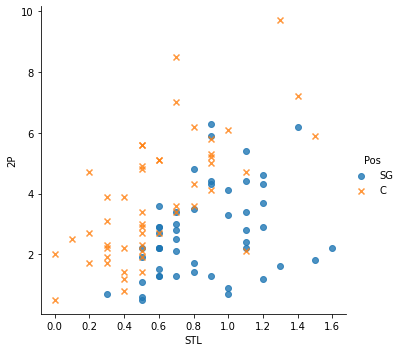

In [80]:
sns.lmplot("STL", "2P", data=df, hue='Pos', markers=['o', 'x'], fit_reg=False)

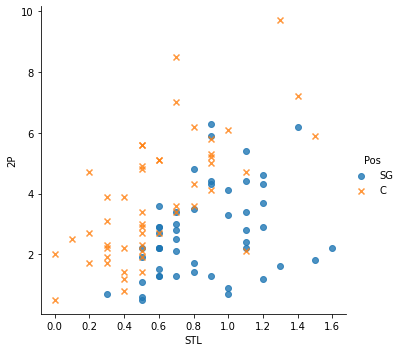

In [81]:
sns.lmplot("STL", "2P", data=df, hue='Pos', markers=['o', 'x'], fit_reg=False)

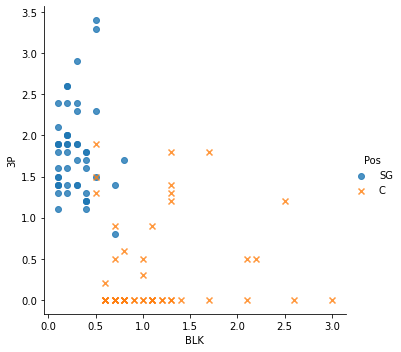

In [82]:
sns.lmplot("BLK", "3P", data=df, hue='Pos', markers=['o', 'x'], fit_reg=False)

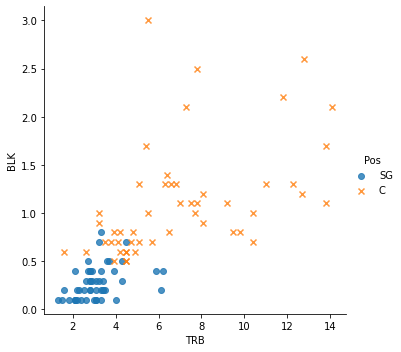

In [83]:
sns.lmplot("TRB", "BLK", data=df, hue='Pos', markers=['o', 'x'], fit_reg=False)

In [84]:
df.drop(["2P", "AST", "STL"], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
# [트레이닝 데이터프레임 80%, 테스트 데이터프레임 20%]
train, test = train_test_split(df, train_size=0.8) # train_test_split(df, test_size=0.2) train 대신 test_size를 지정할 수 있음

In [87]:
print(train.shape)
print(test.shape)

(80, 5)
(20, 5)


In [88]:
train.to_csv("basketball_train.csv", index=None)
test.to_csv("basketball_test.csv", index=None)

In [89]:
# 최적의 k값?
# k=3~학습데이터의 절반 (maxKRange) 크기

maxKRange = train.shape[0] // 2
kList = []

for i in range(3, maxKRange, 2): # 이진분류, 동점 고려
    kList.append(i)

In [90]:
# 교차검증(cross-validation)
# train: 80건 / 10 fold = 8건씩 * 10개 폴드 
# 1번째 폴드(test), 2번째 ~ 10번째 폴드(train) -> k - 1 subsets
# ...

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [124]:
train.head()
x_train = train[["3P", "TRB", "BLK"]]
y_train = train[['Pos']]

In [125]:
print(x_train.shape)
print(y_train.shape)
print(y_train.values.ravel()) # 1차원으로 변경

(80, 3)
(80, 1)
['SG' 'SG' 'C' 'C' 'C' 'SG' 'SG' 'C' 'SG' 'SG' 'C' 'C' 'SG' 'SG' 'C' 'SG'
 'SG' 'SG' 'SG' 'SG' 'C' 'SG' 'SG' 'C' 'C' 'C' 'C' 'SG' 'C' 'SG' 'C' 'C'
 'C' 'SG' 'C' 'SG' 'SG' 'C' 'C' 'C' 'SG' 'SG' 'C' 'SG' 'C' 'SG' 'C' 'C'
 'SG' 'SG' 'C' 'SG' 'SG' 'SG' 'SG' 'C' 'C' 'C' 'C' 'C' 'SG' 'SG' 'C' 'SG'
 'C' 'C' 'C' 'SG' 'C' 'C' 'SG' 'SG' 'C' 'SG' 'SG' 'C' 'C' 'SG' 'SG' 'C']


In [126]:
cross_val_scores = []

for k in kList:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring="accuracy")
    cross_val_scores.append(score.mean())
    
cross_val_scores

[0.9,
 0.875,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9,
 0.9125,
 0.9,
 0.875,
 0.875,
 0.875,
 0.8625,
 0.875,
 0.85,
 0.85,
 0.85,
 0.85,
 0.8375]

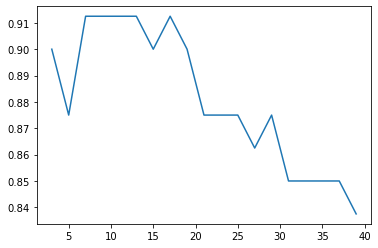

In [127]:
plt.plot(kList, cross_val_scores)

In [128]:
k = kList[cross_val_scores.index(max(cross_val_scores))]
print("최적의 k=" + str(k))

최적의 k=7


In [140]:
# 3점슛과 블로킹 데이터로 포지션 예측하기
knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[["3P", "TRB", "BLK"]]
y_train = train[["Pos"]]

# 모델 생성
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=7)

In [141]:
test.head()

,Player,Pos,3P,TRB,BLK
18,DeMarcus Cousins,C,1.8,11.0,1.3
7,Marco Belinelli,SG,1.4,2.4,0.1
94,Denzel Valentine,SG,1.3,2.6,0.1
90,Tristan Thompson,C,0.0,9.2,1.1
53,DeAndre Jordan,C,0.0,13.8,1.7


In [143]:
prediction = knn.predict(test[["3P", "TRB", "BLK"]])

In [144]:
result = pd.DataFrame({"예측": prediction, "정답": test["Pos"].values.ravel()})
result

,예측,정답
0,C,C
1,SG,SG
2,SG,SG
3,C,C
4,C,C
5,SG,SG
6,C,C
7,SG,SG
8,SG,SG
9,C,C


In [114]:
from sklearn.metrics import accuracy_score

In [145]:
print("정확도 " + str(accuracy_score(test['Pos'], prediction)))

정확도 0.9
